In [1]:
import json
import pandas as pd
import numpy as np
import glob
import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey', 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False, 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w', 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False, 'xtick.color': 'dimgrey', 'xtick.direction': 'out', 'xtick.top': False,
 'ytick.color': 'dimgrey', 'ytick.direction': 'out', 'ytick.left': False, 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16, "axes.titlesize":20, "axes.labelsize":18})

In [3]:
path = "./data/samsunghealth/jsons/com.samsung.shealth.tracker.oxygen_saturation"
all_jsons = glob.glob(f"{path}/**/*.json")

In [4]:
data = []
for path in tqdm.tqdm(all_jsons):
    data.extend(json.load(open(path, "r")))

100%|██████████| 368/368 [00:00<00:00, 3057.25it/s]


In [5]:
df = pd.DataFrame(data=data)
df['local'] = pd.to_datetime(df.start_time, unit="ms", utc=True) + pd.Timedelta(hours=-6) # central time
df['nos'] = pd.to_datetime(df.start_time, unit="ms", utc=True) + pd.Timedelta(hours=-26) # bin into "nights of sleep"
df['nos'] = df['nos'].dt.date
df = df.sort_values(by=['start_time'])
df

,spo2,spo2_max,spo2_min,start_time,end_time,local,nos
97064,0,95,93,1642741725020,1642741784020,2022-01-20 23:08:45.020000+00:00,2022-01-20
97065,0,95,93,1642741785020,1642741844020,2022-01-20 23:09:45.020000+00:00,2022-01-20
97066,0,94,94,1642741965020,1642742024020,2022-01-20 23:12:45.020000+00:00,2022-01-20
97067,0,95,93,1642742025020,1642742084020,2022-01-20 23:13:45.020000+00:00,2022-01-20
97068,0,94,94,1642742085020,1642742144020,2022-01-20 23:14:45.020000+00:00,2022-01-20
...,...,...,...,...,...,...,...
62268,0,98,96,1677243231790,1677243290790,2023-02-24 06:53:51.790000+00:00,2023-02-23
62269,0,97,96,1677243291790,1677243350790,2023-02-24 06:54:51.790000+00:00,2023-02-23
62270,0,96,96,1677243351790,1677243410790,2023-02-24 06:55:51.790000+00:00,2023-02-23
62271,0,97,96,1677243411790,1677243470790,2023-02-24 06:56:51.790000+00:00,2023-02-23


In [6]:
min_sp02 = df.spo2_min.min()
min_sp02

70

In [7]:
def plot_day(day):
    refined_day = pd.to_datetime(day, utc=True).floor('D').date()
    df_day = df[(df.nos == refined_day)]
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 5)
    ax.plot(df_day.local, (df_day.spo2_min + df_day.spo2_max)/2, color='C0')
    ax.fill_between(df_day.local, df_day.spo2_min, df_day.spo2_max, alpha=0.5)
    ax.set_ylim([min_sp02, 100])
    xformatter = mdates.DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)

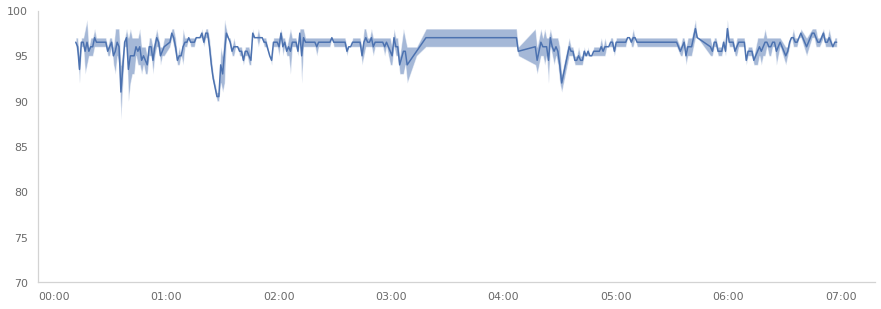

In [8]:
plot_day('2023-02-23')

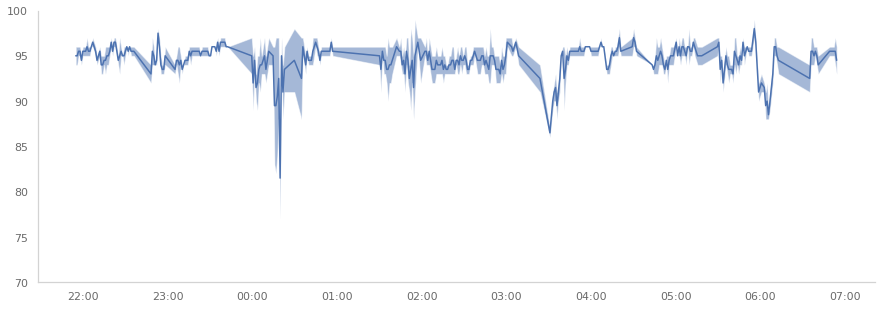

In [9]:
plot_day('2023-02-21')